# Turtle Trading Backtesting 🐢

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from turtlesystem import TurtleSystem
from turtlesystem import getStratStats


In [36]:
# Diversified collection of tickers from the 11 sectors of the S&P500
tickers = [
           'MSFT', 'IBM', # tech
           'CVS', 'JNJ', # healthcare
           'V', 'BAC', 'PYPL', # finance
           'AMT', # real estate
           'XOM', 'SHEL', # energy
           'DD', 'APD', #materials
           'BBY', 'HD', # consumer
           'HON', 'BA', # industrials
           'AES', 'UGI', # utilities
           'KO', 'COST', # consumer staples
           'CMCSA', 'ATVI' # communications
          ]

print("Ticker Symbols:")
_ = [print(f"\t{i}") for i in tickers]


Ticker Symbols:
	MSFT
	IBM
	CVS
	JNJ
	V
	BAC
	PYPL
	AMT
	XOM
	SHEL
	DD
	APD
	BBY
	HD
	HON
	BA
	AES
	UGI
	KO
	COST
	CMCSA
	ATVI


### Backtesting from 2000

[*********************100%***********************]  22 of 22 completed


/Users/tomwetherell/Documents/GitHub/turtle-trading/turtlesystem.py:286: RuntimeWarning: invalid value encountered in double_scalars
  avg_price = (position['entry_price'] * position['shares'] +
/Users/tomwetherell/Documents/GitHub/turtle-trading/turtlesystem.py:309: RuntimeWarning: invalid value encountered in double_scalars
  avg_price = (position['entry_price'] * position['shares'] +


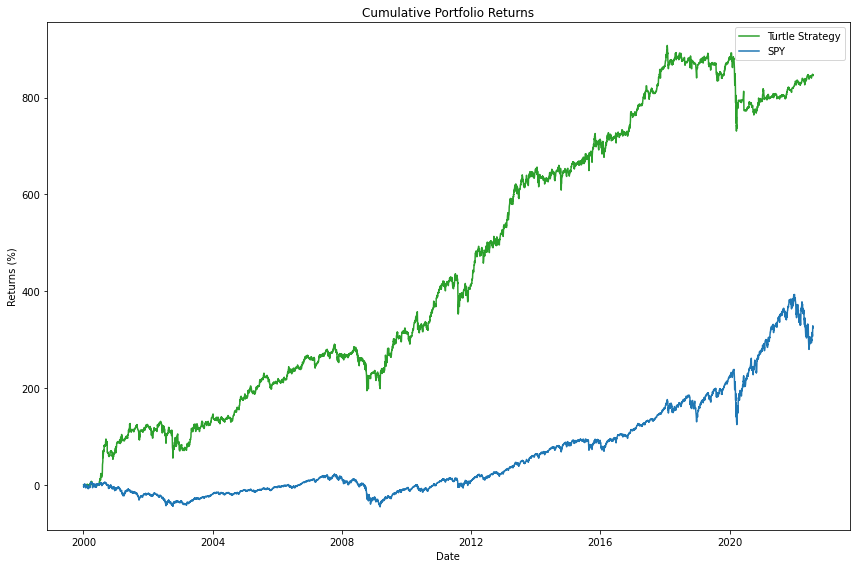

,tot_returns,annual_returns,annual_volatility,sortino_ratio,sharpe_ratio,max_drawdown,max_drawdown_duration
Turtle,8.4586,0.1048,0.1480,0.6887,0.5729,0.3288,1649
SPY,3.2444,0.0662,0.1979,0.2877,0.2336,0.5519,2407


In [43]:
sys2000 = TurtleSystem(tickers, start='2000-01-01')
sys2000.run()

port_values = sys2000.get_portfolio_values()
returns = port_values / port_values.shift(1)
log_returns = np.log(returns)
cum_rets = log_returns.cumsum()

# Compare to SPY baseline
sp500 = yf.Ticker('SPY').history(start=sys2000.start, end=sys2000.end)
sp500['returns'] = sp500['Close'] / sp500['Close'].shift(1)
sp500['log_returns'] = np.log(sp500['returns'])
sp500['cum_rets'] = sp500['log_returns'].cumsum()

plt.figure(figsize=(12, 8))
plt.plot((np.exp(cum_rets) -1 )* 100, label='Turtle Strategy', color='tab:green')
plt.plot((np.exp(sp500['cum_rets']) - 1) * 100, label='SPY', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('Cumulative Portfolio Returns')
plt.legend()
plt.tight_layout()
plt.show()

stats = getStratStats(log_returns)
spy_stats = getStratStats(sp500['log_returns'])
df_stats = pd.DataFrame(stats, index=['Turtle'])
df_stats = pd.concat([df_stats, pd.DataFrame(spy_stats, index=['SPY'])])
df_stats

### Backtesting from 2010

[*********************100%***********************]  22 of 22 completed


/Users/tomwetherell/Documents/GitHub/turtle-trading/turtlesystem.py:286: RuntimeWarning: invalid value encountered in double_scalars
  avg_price = (position['entry_price'] * position['shares'] +
/Users/tomwetherell/Documents/GitHub/turtle-trading/turtlesystem.py:309: RuntimeWarning: invalid value encountered in double_scalars
  avg_price = (position['entry_price'] * position['shares'] +


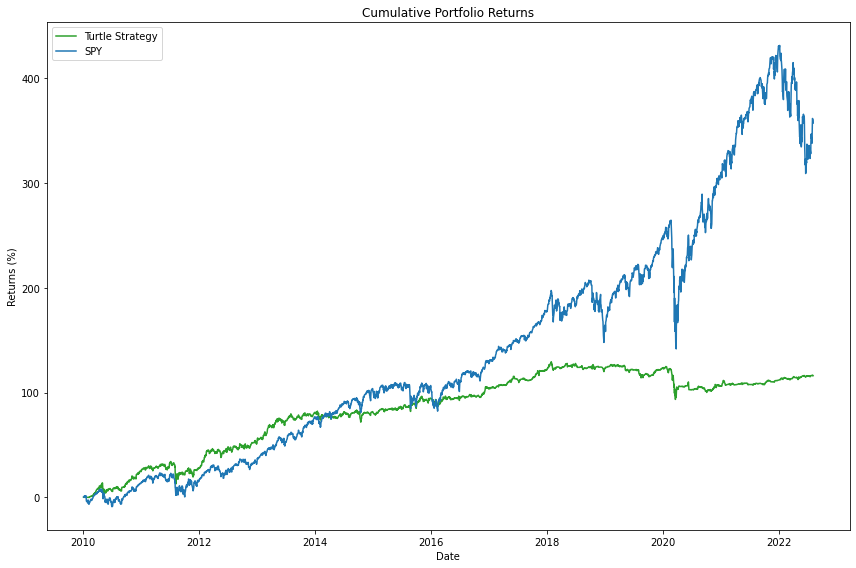

,tot_returns,annual_returns,annual_volatility,sortino_ratio,sharpe_ratio,max_drawdown,max_drawdown_duration
Turtle,1.1610,0.0632,0.0841,0.5738,0.5143,0.1596,1649
SPY,3.5734,0.1286,0.1742,0.7299,0.6235,0.3372,280


In [44]:
sys2010 = TurtleSystem(tickers, start='2010-01-01')
sys2010.run()

port_values = sys2010.get_portfolio_values()
returns = port_values / port_values.shift(1)
log_returns = np.log(returns)
cum_rets = log_returns.cumsum()

# Compare to SPY baseline
sp500 = yf.Ticker('SPY').history(start=sys2010.start, end=sys2010.end)
sp500['returns'] = sp500['Close'] / sp500['Close'].shift(1)
sp500['log_returns'] = np.log(sp500['returns'])
sp500['cum_rets'] = sp500['log_returns'].cumsum()

plt.figure(figsize=(12, 8))
plt.plot((np.exp(cum_rets) -1 )* 100, label='Turtle Strategy', color='tab:green')
plt.plot((np.exp(sp500['cum_rets']) - 1) * 100, label='SPY', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('Cumulative Portfolio Returns')
plt.legend()
plt.tight_layout()
plt.show()

stats = getStratStats(log_returns)
spy_stats = getStratStats(sp500['log_returns'])
df_stats = pd.DataFrame(stats, index=['Turtle'])
df_stats = pd.concat([df_stats, pd.DataFrame(spy_stats, index=['SPY'])])
df_stats